## Zomato Rating.
DESCRIPTION

Using NLP and machine learning, make a model to predict the rating in a review based on the content of the text review. This will help identify cases with a mismatch.

### Problem Statement: 
Zomato is India’s largest platform for discovering restaurants and ordering food. It operates in India as well as a few cities internationally. Bangalore is one of the biggest customers and restaurant bases for Zomato with 4 to 5 million users using the platform each month.

Users on the platform can also post reviews of restaurants and provide a rating accompanying the review. The content in the reviews should ideally reflect the rating provided by the customer. In many cases, there is a mismatch, owing to multiple reasons, where the rating does not match the customer review. The reviews and rating match is very important as it builds customer trust on the platform and helps the user get an accurate picture of the restaurant. 

You, as a data scientist, need to enable the identification and cleanup of such cases to ensure the ratings reflect the reviews and that the reviews seem trustworthy to the customer. You will need to use NLP techniques in conjunction with machine learning models to predict the rating from the review text. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, RegexpStemmer,SnowballStemmer,WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from nltk.corpus import brown
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import nltk
from sklearn.metrics.pairwise import cosine_similarity
import spacy
import string as str
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from nltk.corpus import wordnet as wn
from sklearn.linear_model import LogisticRegression
from nltk.metrics.distance import jaccard_distance
from nltk.util import ngrams
from nltk.corpus import words
from nltk.probability import ConditionalFreqDist
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from nltk.stem import PorterStemmer,WordNetLemmatizer
from spellchecker import SpellChecker
PS = PorterStemmer()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error,mean_squared_log_error,r2_score,classification_report,confusion_matrix
import seaborn as sns
from collections import  Counter


import warnings
warnings.filterwarnings('ignore')

### Task <br>
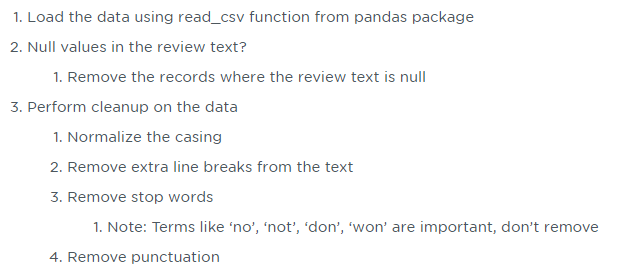

In [2]:
Zomato_reviews = pd.read_csv('C:/Working Files/Mac ka folder/Simplilearn/NLP/Online Classes/Day7/Zomato_reviews.csv')

In [3]:
Zomato_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27762 entries, 0 to 27761
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rating       27762 non-null  float64
 1   review_text  27748 non-null  object 
dtypes: float64(1), object(1)
memory usage: 433.9+ KB


In [4]:
Zomato_reviews.isnull().sum()

rating          0
review_text    14
dtype: int64

In [5]:
Zomato_reviews.dropna(inplace=True)

In [6]:
Zomato_reviews.isnull().sum()

rating         0
review_text    0
dtype: int64

### Set of EDA steps.. 
1. decontracted
2. textPreprocessing
3. Spell_correct

In [7]:
def decontracted(phrase):
    phrase = re.sub(r"ain't", "am not", phrase)
    phrase = re.sub(r"aren't", "are not", phrase)
    phrase = re.sub(r"can't", "cannot", phrase)
    phrase = re.sub(r"can't've", "cannot have", phrase)
    phrase = re.sub(r"'cause", "because", phrase)
    phrase = re.sub(r"could've", "could have", phrase)
    phrase = re.sub(r"couldn't", "could not", phrase)
    phrase = re.sub(r"couldn't've", "could not have", phrase)
    phrase = re.sub(r"didn't", "did not", phrase)
    phrase = re.sub(r"doesn't", "does not", phrase)
    phrase = re.sub(r"don't", "do not", phrase)
    phrase = re.sub(r"hadn't", "had not", phrase)
    phrase = re.sub(r"hadn't've", "had not have", phrase)
    phrase = re.sub(r"hasn't", "has not", phrase)
    phrase = re.sub(r"haven't", "have not", phrase)
    phrase = re.sub(r"he'd", "he had", phrase)
    phrase = re.sub(r"he'd've", "he would have", phrase)
    phrase = re.sub(r"he'll", "he will", phrase)
    phrase = re.sub(r"he'll've", "he will have", phrase)
    phrase = re.sub(r"he's", "he is", phrase)
    phrase = re.sub(r"how'd", "how did", phrase)
    phrase = re.sub(r"how'd'y", "how do you", phrase)
    phrase = re.sub(r"how'll", "how will", phrase)
    phrase = re.sub(r"how's", "how is", phrase)
    phrase = re.sub(r"I'd", "I had", phrase)
    phrase = re.sub(r"I'd've", "I would have", phrase)
    phrase = re.sub(r"I'll", "I will", phrase)
    phrase = re.sub(r"I'll've", "I will have", phrase)
    phrase = re.sub(r"I'm", "I am", phrase)
    phrase = re.sub(r"I've", "I have", phrase)
    phrase = re.sub(r"isn't", "is not", phrase)
    phrase = re.sub(r"it'd", "it had", phrase)
    phrase = re.sub(r"it'd've", "it would have", phrase)
    phrase = re.sub(r"it'll", "it will", phrase)
    phrase = re.sub(r"it'll've", "iit will have", phrase)
    phrase = re.sub(r"it's", "it is", phrase)
    phrase = re.sub(r"let's", "let us", phrase)
    phrase = re.sub(r"ma'am", "madam", phrase)
    phrase = re.sub(r"mayn't", "may not", phrase)
    phrase = re.sub(r"might've", "might have", phrase)
    phrase = re.sub(r"mightn't", "might not", phrase)
    phrase = re.sub(r"mightn't've", "might not have", phrase)
    phrase = re.sub(r"must've", "must have", phrase)
    phrase = re.sub(r"mustn't", "must not", phrase)
    phrase = re.sub(r"mustn't've", "must not have", phrase)
    phrase = re.sub(r"needn't", "need not", phrase)
    phrase = re.sub(r"needn't've", "need not have", phrase)
    phrase = re.sub(r"o'clock", "of the clock", phrase)
    phrase = re.sub(r"oughtn't", "ought not", phrase)
    phrase = re.sub(r"oughtn't've", "ought not have", phrase)
    phrase = re.sub(r"shan't", "shall not", phrase)
    phrase = re.sub(r"sha'n't", "shall not", phrase)
    phrase = re.sub(r"shan't've", "shall not have", phrase)
    phrase = re.sub(r"she'd", "she had", phrase)
    phrase = re.sub(r"she'd've", "she would have", phrase)
    phrase = re.sub(r"she'll", "she will", phrase)
    phrase = re.sub(r"she'll've", "she will have", phrase)
    phrase = re.sub(r"she's", "she is", phrase)
    phrase = re.sub(r"should've", "should have", phrase)
    phrase = re.sub(r"shouldn't", "should not", phrase)
    phrase = re.sub(r"shouldn't've", "should not have", phrase)
    phrase = re.sub(r"so've", "so have", phrase)
    phrase = re.sub(r"so's", "so is", phrase)
    phrase = re.sub(r"that'd", "that had", phrase)
    phrase = re.sub(r"that'd've", "that would have", phrase)
    phrase = re.sub(r"that's", "that is", phrase)
    phrase = re.sub(r"there'd", "there had", phrase)
    phrase = re.sub(r"there'd've", "there would have", phrase)
    phrase = re.sub(r"there's", "there is", phrase)
    phrase = re.sub(r"they'd", "they had", phrase)
    phrase = re.sub(r"they'd've", "they would have", phrase)
    phrase = re.sub(r"they'll", "they will", phrase)
    phrase = re.sub(r"they'll've", "they will have", phrase)
    phrase = re.sub(r"they're", "they are", phrase)
    phrase = re.sub(r"they've", "they have", phrase)
    phrase = re.sub(r"to've", "to have", phrase)
    phrase = re.sub(r"wasn't", "was not", phrase)
    phrase = re.sub(r"we'd", "we had", phrase)
    phrase = re.sub(r"we'd've", "we would have", phrase)
    phrase = re.sub(r"we'll", "we will", phrase)
    phrase = re.sub(r"we'll've", "we will have", phrase)
    phrase = re.sub(r"we're", "we are", phrase)
    phrase = re.sub(r"we've", "we have", phrase)
    phrase = re.sub(r"weren't", "were not", phrase)
    phrase = re.sub(r"what'll", "what will", phrase)
    phrase = re.sub(r"what'll've", "what will have", phrase)
    phrase = re.sub(r"what're", "what are", phrase)
    phrase = re.sub(r"what's", "what is", phrase)
    phrase = re.sub(r"what've", "what have", phrase)
    phrase = re.sub(r"when's", "when is", phrase)
    phrase = re.sub(r"when've", "when have", phrase)
    phrase = re.sub(r"where'd", "where did", phrase)
    phrase = re.sub(r"where's", "where is", phrase)
    phrase = re.sub(r"where've", "where have", phrase)
    phrase = re.sub(r"who'll", "who will", phrase)
    phrase = re.sub(r"who'll've", "who will have", phrase)
    phrase = re.sub(r"who's", "who is", phrase)
    phrase = re.sub(r"who've", "who have", phrase)
    phrase = re.sub(r"why's", "why is", phrase)
    phrase = re.sub(r"why've", "why have", phrase)
    phrase = re.sub(r"will've", "will have", phrase)
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"won't've", "will not have", phrase)
    phrase = re.sub(r"would've", "would have", phrase)
    phrase = re.sub(r"wouldn't", "would not", phrase)
    phrase = re.sub(r"wouldn't've", "would not have", phrase)
    phrase = re.sub(r"y'all", "you all", phrase)
    phrase = re.sub(r"y'all'd", "you all would", phrase)
    phrase = re.sub(r"y'all'd've", "you all would have", phrase)
    phrase = re.sub(r"y'all're", "you all are", phrase)
    phrase = re.sub(r"y'all've", "you all have", phrase)
    phrase = re.sub(r"you'd", "you had", phrase)
    phrase = re.sub(r"you'd've", "you would have", phrase)
    phrase = re.sub(r"you'll", "you will", phrase)
    phrase = re.sub(r"you'll've", "you will have", phrase)
    phrase = re.sub(r"you're", "you are", phrase)
    phrase = re.sub(r"you've", "you have", phrase)
    
    return phrase

In [8]:
my_stopwords = stopwords.words("english")

In [9]:
def textPreprocessing(document):
    document = decontracted(document)
    #1. Remove Punctuations
    sentWithoutPunct = ''.join([char for char in document  if char not in str.punctuation])
    #2. Extract words out of the sentences
    words = sentWithoutPunct.split()
    #3. Normalize the data (lowercase)
    wordNormalized1 = [word.lower() for word in words]
    wordNormalized2 = [word for word in wordNormalized1 if word.isalpha()]
    wordNormalized3 = [word for word in wordNormalized2 if len(word) > 3]
    # 4. Remove Stopwords
    vocabulary = [word for word in wordNormalized3 if word not in my_stopwords]
    sent = ' '.join(vocabulary)
    return sent

In [10]:
Zomato_reviews["review_text"].iloc[1]

"really appreciate their quality and timing . I have tried the thattil kutti dosa I've been addicted to the dosa really and the chutney... really good and money worth much better than a thattukada must try it"

In [11]:
textPreprocessing(Zomato_reviews["review_text"].iloc[1])

'really appreciate quality timing tried thattil kutti dosa addicted dosa really chutney really good money worth much better thattukada must'

In [12]:
spell = SpellChecker(distance=1)
def Spell_correct(x):
    return spell.correction(x)

In [13]:
Spell_correct(textPreprocessing(Zomato_reviews["review_text"].iloc[0]))

'service worst pricing menu different bill give bill increased pricing even serving watermenu order need call times even busy'

In [14]:
Zomato_reviews["clean_text"] = Zomato_reviews["review_text"].apply(textPreprocessing)

In [15]:
Zomato_reviews["clean_text"].iloc[1]

'really appreciate quality timing tried thattil kutti dosa addicted dosa really chutney really good money worth much better thattukada must'

In [16]:
Zomato_reviews["final_clean_text"] = Zomato_reviews["clean_text"].apply(Spell_correct)

In [17]:
Zomato_reviews

,rating,review_text,clean_text,final_clean_text
0,1.0,"Their service is worst, pricing in menu is dif...",service worst pricing menu different bill give...,service worst pricing menu different bill give...
1,5.0,really appreciate their quality and timing . I...,really appreciate quality timing tried thattil...,really appreciate quality timing tried thattil...
2,4.0,"Went there on a Friday night, the place was su...",went friday night place surprisingly empty int...,went friday night place surprisingly empty int...
3,4.0,A very decent place serving good food.\r\nOrde...,decent place serving good food ordered chilli ...,decent place serving good food ordered chilli ...
4,5.0,One of the BEST places for steaks in the city....,best places steaks city tried beef steak chili...,best places steaks city tried beef steak chili...
...,...,...,...,...
27757,4.0,Food quality 4.5/5\r\nHospitality 4/5\r\nManag...,food quality hospitality management response c...,food quality hospitality management response c...
27758,4.0,Taste of the food is good and the ambience as ...,taste food good ambience well need reduce pric...,taste food good ambience well need reduce pric...
27759,5.0,Pizza is really thin crust and made from fresh...,pizza really thin crust made freshly prepared ...,pizza really thin crust made freshly prepared ...
27760,5.0,"Visited last Saturday with my kids ,\r\nIt was...",visited last saturday kids superb crowd good v...,visited last saturday kids superb crowd good v...


### Task <br>
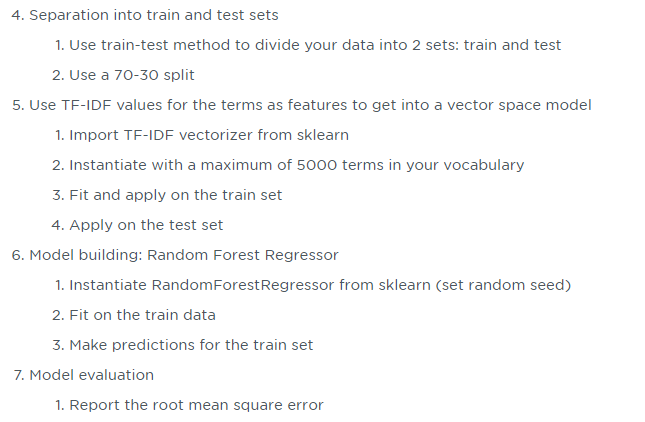

In [18]:
Features = Zomato_reviews["final_clean_text"]

In [19]:
Label = Zomato_reviews["rating"]

In [20]:
vectorizer =  TfidfVectorizer(max_features=5000)

In [21]:
X_train,X_test,y_train,y_test = train_test_split(Features,Label,test_size=0.30,random_state=20)

In [22]:
tf_idf_train = vectorizer.fit_transform(X_train).toarray()

In [23]:
tf_idf_test = vectorizer.fit_transform(X_test).toarray()

In [24]:
print("Train >>", tf_idf_train.shape, "Test >>", tf_idf_test.shape)

Train >> (19423, 5000) Test >> (8325, 5000)


In [25]:
rgr_model = RandomForestRegressor(n_estimators = 50, min_samples_split = 20)

In [26]:
rgr_model.fit(tf_idf_train,y_train)

RandomForestRegressor(min_samples_split=20, n_estimators=50)

In [28]:
prediction = rgr_model.predict(tf_idf_test)
print("mean_squared_error ",mean_squared_error(y_test,prediction))
print("root_mean_squared_error ",np.sqrt(mean_squared_error(y_test,prediction)))
print("r2_score", r2_score(y_test,prediction))

mean_squared_error  1.9276783775320774
root_mean_squared_error  1.3884085773042738
r2_score -0.14525071509912602


In [29]:
rgr_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 50,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Task
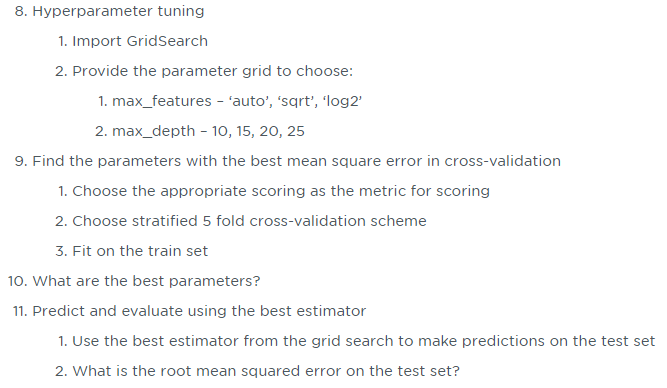

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
rgr_model2 = RandomForestRegressor(n_estimators = 50, min_samples_split = 20)

In [32]:
params = {'max_features':["auto",'sqrt','log2'],'max_depth':[10,15,20,25]}

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer

In [34]:
mse = make_scorer(mean_squared_error,greater_is_better=False)
rsq = make_scorer(r2_score,greater_is_better=True)

In [35]:
model2 = GridSearchCV(rgr_model2,params,cv=5,scoring=mse)

In [36]:
model2.fit(tf_idf_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(min_samples_split=20,
                                             n_estimators=50),
             param_grid={'max_depth': [10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring=make_scorer(mean_squared_error, greater_is_better=False))

In [37]:
prediction = model2.predict(tf_idf_test)
print("mean_squared_error ",mean_squared_error(y_test,prediction))
print("root_mean_squared_error ",np.sqrt(mean_squared_error(y_test,prediction)))
print("r2_score", r2_score(y_test,prediction))

mean_squared_error  2.8721495768256506
root_mean_squared_error  1.694741743400938
r2_score -0.7063693793891159


#### r2_score -0.7839801769021879.. very poor.. 

### Use more features for analysis.. 
1. high_frequency_words present in final_clean_text
2. count_chars
3. count_words
4. count_sent
5. count_unique_words

In [38]:
def top_non_stopwords(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:300]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    return pd.DataFrame(x,y,columns=["word"])

In [39]:
top_300_words = top_non_stopwords(Zomato_reviews["final_clean_text"])

In [40]:
top_300_words.iloc[1:10,0:1]

,word
20360,food
20183,good
9463,chicken
8331,service
6626,ordered
6291,ambience
6025,great
5578,taste
5058,really


In [41]:
def high_frequency(text):
    new= text.split()
    c = []
    for count in range(len(new)):
        if new[count] in top_300_words["word"].values:
            c.append(count)
    return len(c)

In [42]:
high_frequency(Zomato_reviews["final_clean_text"].iloc[0])

13

In [43]:
Zomato_reviews["high_frequency_words"] = Zomato_reviews["final_clean_text"].apply(high_frequency)

In [44]:
def count_chars(text):
    return len(text)
def count_words(text):
    return len(text.split())
def count_sent(text):
    return len(nltk.sent_tokenize(text))
def count_unique_words(text):
    return len(set(text.split()))
Zomato_reviews["count_chars"] = Zomato_reviews["final_clean_text"].apply(count_chars)
Zomato_reviews["count_words"] = Zomato_reviews["final_clean_text"].apply(count_words)
Zomato_reviews["count_sent"] = Zomato_reviews["final_clean_text"].apply(count_sent)
Zomato_reviews["count_unique_words"] = Zomato_reviews["final_clean_text"].apply(count_unique_words)

In [45]:
Zomato_reviews.shape

(27748, 9)

In [46]:
Zomato_reviews.columns

Index(['rating', 'review_text', 'clean_text', 'final_clean_text',
       'high_frequency_words', 'count_chars', 'count_words', 'count_sent',
       'count_unique_words'],
      dtype='object')

In [47]:
tf_idf_feartures = vectorizer.fit_transform(Zomato_reviews["final_clean_text"]).toarray()

In [48]:
tf_idf_feartures.shape

(27748, 5000)

In [49]:
Features_DF = pd.DataFrame(tf_idf_feartures)

In [50]:
Features_DF.shape

(27748, 5000)

In [51]:
DF_Merge = pd.merge(Features_DF,Zomato_reviews[['high_frequency_words', 'count_chars', 'count_words', 'count_sent','count_unique_words','rating']],left_index=True, right_index=True)

In [52]:
DF_Merge.shape

(27734, 5006)

In [53]:
Features = DF_Merge.drop(["rating"],axis=1)

In [54]:
Label = DF_Merge["rating"]

In [55]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(Features,Label,test_size=0.30,random_state=20)

In [56]:
rgr_model1 = RandomForestRegressor(n_estimators = 50, min_samples_split = 20)

In [57]:
rgr_model1.fit(X_train1,y_train1)

RandomForestRegressor(min_samples_split=20, n_estimators=50)

In [66]:
prediction1 = rgr_model1.predict(X_test1)
print("mean_squared_error ",mean_squared_error(y_test1,prediction1))
print("root_mean_squared_error ",np.sqrt(mean_squared_error(y_test1,prediction1)))
print("r2_score", r2_score(y_test1,prediction1))

mean_squared_error  0.673763035747779
root_mean_squared_error  0.8208306985900192
r2_score 0.5931326252829687


## Deployment Phase using Label as continuous

In [74]:
textInput = input("Enter Feedback: ")
textInput_clean = textPreprocessing(textInput)
textInput_cleaned = Spell_correct(textInput_clean)
vectorizer =  TfidfVectorizer(max_features=5000)
tf_idf_textInput = vectorizer.fit_transform([textInput_cleaned]).toarray()
num_rows, num_cols = tf_idf_textInput.shape
missing_cols = 5000 - num_cols
tf_idf_textInput_revised = np.append(tf_idf_textInput,np.zeros((1,missing_cols)),axis = 1)
high_frequency_words = high_frequency(textInput_cleaned)
count_chars1 = len(textInput_cleaned)
count_words1 = len(textInput_cleaned.split())
count_sent1 = len(nltk.sent_tokenize(textInput_cleaned))
count_unique_words1 = len(set(textInput_cleaned.split()))

Features_DF1 = pd.DataFrame(tf_idf_textInput_revised)
Feature_list = [[high_frequency_words,count_chars1,count_words1,count_sent1,count_unique_words1]]
Features_DF2 = pd.DataFrame(Feature_list)
featureSet = pd.merge(Features_DF1,Features_DF2,left_index=True, right_index=True)

print("Predicted Feedback is",np.round(rgr_model1.predict(featureSet),0))

Enter Feedback: One of the BEST places for steaks in the city. Tried the BEEF STEAK WITH CHILI RUM & GRILLED FISH WITH ORANGE AND JALAPENOS. Both were exceptionally good. The herbed rice and mashed potatoes serves alongside were equally delecatble. Service is prompt and Zomato Gold is a great steal. If you are a steak lover, this place is a must visit. Hope they come up with another ourself somewhere in the CBD.  Wish to be back soon. Bon Appetit !
Predicted Feedback is [4.]


In [116]:
print(Zomato_reviews["review_text"].iloc[4])
print(Zomato_reviews["rating"].iloc[4])

One of the BEST places for steaks in the city. Tried the BEEF STEAK WITH CHILI RUM & GRILLED FISH WITH ORANGE AND JALAPENOS. Both were exceptionally good. The herbed rice and mashed potatoes serves alongside were equally delecatble. Service is prompt and Zomato Gold is a great steal. If you are a steak lover, this place is a must visit. Hope they come up with another ourself somewhere in the CBD.

Wish to be back soon.
Bon Appetit !
5.0


## Deployment live testing.. 

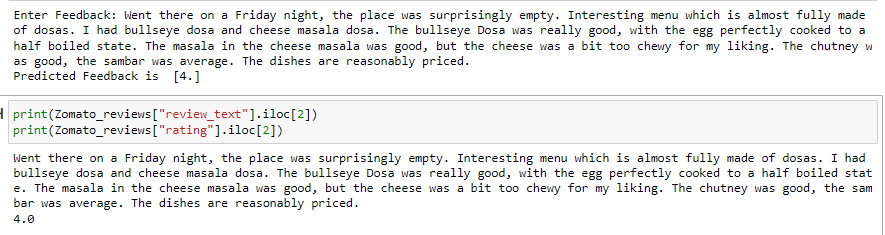

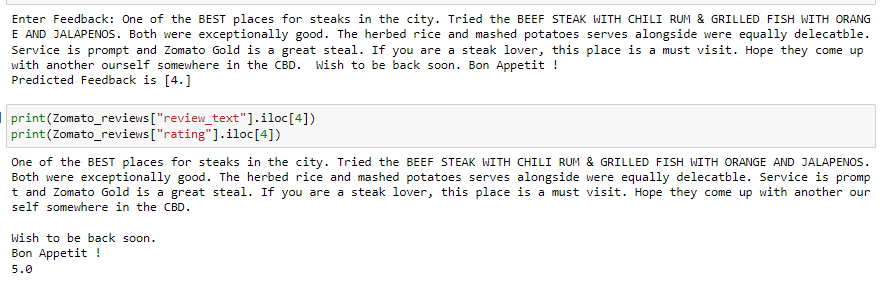

### Label is being used as continuous variable. Let's analyze it using categorical type. We'll use Random Forest Classifier

In [81]:
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()

In [82]:
Zomato_reviews["rating"].value_counts()

4.0    8631
5.0    8108
3.0    3761
1.0    3126
2.0    1675
3.5    1077
4.5     932
2.5     261
1.5     177
Name: rating, dtype: int64

In [78]:
Zomato_reviews["c-rating"] = lencoder.fit_transform(Zomato_reviews["rating"])

In [79]:
Zomato_reviews["c-rating"].value_counts()

6    8631
8    8108
4    3761
0    3126
2    1675
5    1077
7     932
3     261
1     177
Name: c-rating, dtype: int64

### Mapping
4.0 = 6 <br>
5.0 = 8 <br>
3.0 = 4 <br>
1.0 = 0 <br>
2.0 = 2 <br>
3.5 = 5 <br>
4.5 = 7 <br>
2.5 = 3 <br>
1.5 = 1 <br>

In [86]:
DF_Merge1 = pd.merge(Features_DF,Zomato_reviews[['high_frequency_words', 'count_chars', 'count_words', 'count_sent','count_unique_words','c-rating']],left_index=True, right_index=True)

In [93]:
DF_Merge1.shape

(27734, 5006)

In [88]:
Features_new = DF_Merge1.drop(["c-rating"],axis=1)

In [99]:
Label_new = DF_Merge1["c-rating"]

In [100]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(Features_new,Label_new,test_size=0.30,random_state=20)

In [101]:
X_train2.shape

(19413, 5005)

In [102]:
cls_model = RandomForestClassifier(n_estimators = 50, min_samples_split = 20)

In [103]:
cls_model.fit(X_train2,y_train2)

RandomForestClassifier(min_samples_split=20, n_estimators=50)

In [104]:
print("Training score is ",cls_model.score(X_train2,y_train2))
print("Testing score is ",cls_model.score(X_test2,y_test2))

Training score is  0.945397414103951
Testing score is  0.7485879101069582


In [105]:
print(classification_report(y_train2,cls_model.predict(X_train2)))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2164
           1       0.99      0.86      0.92       132
           2       0.99      0.88      0.93      1209
           3       0.98      0.86      0.92       192
           4       0.97      0.91      0.94      2642
           5       0.98      0.90      0.94       738
           6       0.94      0.96      0.95      6022
           7       0.99      0.90      0.94       661
           8       0.93      0.97      0.95      5653

    accuracy                           0.95     19413
   macro avg       0.97      0.91      0.94     19413
weighted avg       0.95      0.95      0.95     19413



## Deployment Phase using Label as categorical

In [120]:
textInput = input("Enter Feedback: ")
textInput_clean = textPreprocessing(textInput)
textInput_cleaned = Spell_correct(textInput_clean)
vectorizer =  TfidfVectorizer(max_features=5000)
tf_idf_textInput = vectorizer.fit_transform([textInput_cleaned]).toarray()
num_rows, num_cols = tf_idf_textInput.shape
missing_cols = 5000 - num_cols
tf_idf_textInput_revised = np.append(tf_idf_textInput,np.zeros((1,missing_cols)),axis = 1)
high_frequency_words = high_frequency(textInput_cleaned)
count_chars1 = len(textInput_cleaned)
count_words1 = len(textInput_cleaned.split())
count_sent1 = len(nltk.sent_tokenize(textInput_cleaned))
count_unique_words1 = len(set(textInput_cleaned.split()))

Features_DF1 = pd.DataFrame(tf_idf_textInput_revised)
Feature_list = [[high_frequency_words,count_chars1,count_words1,count_sent1,count_unique_words1]]
Features_DF2 = pd.DataFrame(Feature_list)
featureSet = pd.merge(Features_DF1,Features_DF2,left_index=True, right_index=True)
print("="*25)
print("Predicted Feedback is",cls_model.predict(featureSet))

Enter Feedback: In mood for some mouth watering continental food? This is a must visit. Simply amazing food. I tried the chicken wings and it was simply yum. This place is a Zomato Gold partner.  Items tasted - Garlic bread, Chicken wings, Pork knight rises steak, Captain Jack Daniels chicken steak, Cheese penne Alfredo.  The place is small but the ambience and service is good. Value for money. You can try out this place with friends or family. A must visit if you love continental food.  Overall rating of 4/5.
Predicted Feedback is [6]


In [119]:
print(Zomato_reviews["review_text"].iloc[124])
print(Zomato_reviews["c-rating"].iloc[124])

In mood for some mouth watering continental food? This is a must visit. Simply amazing food. I tried the chicken wings and it was simply yum. This place is a Zomato Gold partner.

Items tasted - Garlic bread, Chicken wings, Pork knight rises steak, Captain Jack Daniels chicken steak, Cheese penne Alfredo.

The place is small but the ambience and service is good. Value for money. You can try out this place with friends or family. A must visit if you love continental food.

Overall rating of 4/5.
6


## Deployment live testing.. 
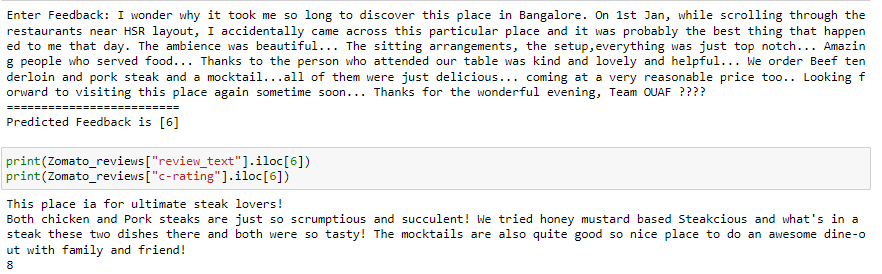
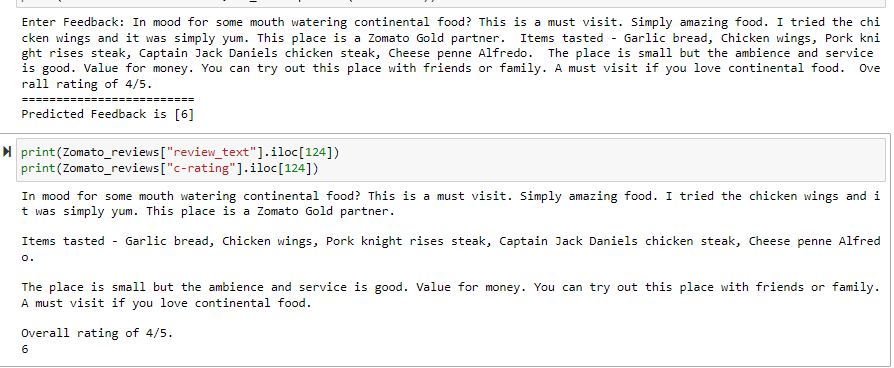